# HW2 - Team Project 1
- 조장: 이철현

* DataSet : Practice1_dist.xlsx


# 1. Data 전처리

* 전처리과정에서 진행한 처리
> 1. sample_info에 char형 index번호 int형으로 만들기
> 2. sample_info의 index 번호에 맞춰서 dataset 정렬해주기
> 3. 특징 추출
> 4. 각 Class 별 몇개의 데이터가 있는지 & 시각화(특징 추출 용)

### 1. sample_info에 char형 index번호 int형으로 만들기
이 과정에서는 Char형으로 선언 되어있는 index번호 int형으로 만드는 작업이다.

### 2. sample_info의 index 번호에 맞춰서 dataset 정렬해주기
sample_info에 있는 index 번호에 맞춰서 Dataset에 있는 index와 매칭하여 Data-Frame을 만들어준다.

### 3 . 특징 추출
특징이 241개로 너무 많아서 각 특징에서 최대값(Max)과 최소값(Min)을 뺀 차이(Gap)를 보았더니<br>

> * 2 이상의 값
> * 2 미만의 값 ( 0에 가까운 값들 )
<br>

위와같이 2개의 분류로 나누어졌다. 그 차이(Gap)가 2이상인 Feature들의 Index를 usful_b에 모으고<br>
차이(Gap)가 2미만인 즉, 0에 가까운 Feature들을 usful_s에 모은다.


Over than 2 Feature (X_b) : 151개

[2, 3, 4, 5, 6, 7, 8, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240]

Under than 2 Feature (X_s) : 90개

[0, 1, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,

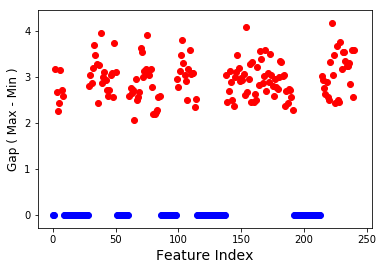

Class0: 53 (0.33125% )
Class1: 36 (0.225% )
Class2: 59 (0.36875% )
Class3: 12 (0.075% )


In [1]:
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

%matplotlib inline

# 1. sample_info에 char형 index번호 int형으로 만들기 # - 준하, 철현 -
sample = pd.read_excel('Practice1_dist.xlsx',sheet_name='sample_info', header=None)
data = pd.read_excel('Practice1_dist.xlsx',sheet_name='dataset', header=None)

index = []
for i in range(160):
    code = int(sample.iloc[i,0].rstrip('\''))
    index.append(code)
    
# 2. sample_info의 index 번호에 맞춰서 dataset 정렬해주기 #
    
index = pd.DataFrame(index)
label = pd.DataFrame(sample.iloc[:,1])

sample = pd.merge(index, label,left_index=True,right_index=True )
sample = sample.sort_values(by=0)

data = pd.merge(sample, data,left_index=True,right_index=True )

data = data.reset_index(drop=True)

X = data.iloc[:,2:]
Y = data.iloc[:,1]

X.columns = [Feature for Feature in range(241)]


# 1.1 - 사용할 만한 특징 값 찾기 # - 철현의 의견 -

# 사용할 특징의 열번호를 저장할 List # 
usful_b = [] # Gap 이 2이상인 것들
usful_s = [] # Gap 이 2미만 인 0에 가까운 인 것들

for Feature in range(241):
    Max = max(X[Feature])
    Min = min(X[Feature])
    gap = Max - Min
    if(gap > 2):
        plt.scatter(Feature, gap , c = 'red')
        usful_b.append(Feature)
    else:
        plt.scatter(Feature, gap , c = 'blue')
        usful_s.append(Feature)
        
# Gap이 2이상인 특징들 #
X_b = X.iloc[:,usful_b]
X_b.columns = [Feature for Feature in range(len(usful_b))]

# Gap이 0에 가까운 특징들 #
X_s = X.iloc[:,usful_s]
X_s.columns = [Feature for Feature in range(len(usful_s))]

# 출력 #
print("Over than 2 Feature (X_b) : {0}개\n".format(len(usful_b))) # usful_b
print(usful_b)
print()
print("Under than 2 Feature (X_s) : {0}개\n".format(len(usful_s))) # usful_s
print(usful_s)
plt.xlabel('Feature Index', fontsize = 14)
plt.ylabel('Gap ( Max - Min )', fontsize = 12)
plt.show()

# Class의 Balance 확인 #
a = 0
b = 0
c = 0
d = 0
for i in Y:
    if(i == 0) : 
        a += 1
    if(i == 1) : 
        b += 1
    if(i == 2) : 
        c += 1
    if(i == 3) : 
        d += 1

s = a + b + c + d
for i, cls in zip([j for j in range(4)], [a, b, c, d]):
    print("Class" + str(i) + ": " + str(cls) +" (" +str(float(cls/s)) + "% )")


### 위 데이터를 통한 이번 데이터 학습의 장애물
* 1. Class의 불균형<br>
> 해결책 : 학습데이터의 과대표준화(OverSampleing) <br>
* 2. 너무 많은 특징들 <br>
> 해결책 : 특징추출 ( 특징의 데이터의 최대값 최소값을 뺀 차이(Gap)을 이용하여 (Gap)이 2이상인 특징과 2미만인 특징으로 나눈다.


<br>
<br>
<br>


# 2. 데이터 학습 및 성능점수 추출

* 사용 한 학습 데이터 : X_b, X_s
> 이유 : X_b는 "2이상의 Gap을 갖는 특징들의 모임"이고 X_s는 "2미만의 Gap을 갖는 특징들의 모임"이다. 2가지 데이터를 모두 사용했다. 

* 사용 한 분류기 모델 : SVM - RBF Kernel , RandomForest<br>
> 이유 : 특성값이 많아서 가장 성능이 잘 나올 것으로 판단 되었기 때문이다.

* 사용 한 검증데이터 모델 : Leave-One-Out <br>
> 이유 : Class의 불균형에 의해서 학습데이터 쪽으로 상대적으로 개수가 적은 Class가 쏠리는 현상을 막기위해서 사용하였다.

* 데이터 불균형 처리 : RandomOverSampler <br>
> 이유 : 데이터의 불균형을 처리하기위해서 과대표준화(OverSampleing) 모델을 사용하였다. <br>
> (!) 주의할 점 : 분류기를 학습하기 위한 데이터에만 과대표준화 모델을 적용 하여야한다. 즉 평가데이터에는 영향을 미치면 안된다. 

* 조정 파라미터 : C, gamma
> 이유 : SVM에서는 C 값과 gamma 값을, RandomForest에서는 n값을 조정하였을때 성능의 변화가 일어났다.

## 2.1 SVM-RBF kernel

In [2]:
!pip install -U imblearn 
# Random Over Sampler 모델을 사용하기 위해서 설치하는 라이브러리 이다.

Requirement already up-to-date: imblearn in c:\users\chorong\appdata\roaming\python\python37\site-packages (0.0)


In [3]:
# 필요한 라이브러리(패키지) 목록
from sklearn.model_selection import LeaveOneOut # Leave-One-Out
from sklearn.model_selection import KFold # KFold
from sklearn.model_selection import train_test_split # Hold-Out

from sklearn.svm import SVC # 분류기

from imblearn.over_sampling import * # 과대표준화 하기위한 라이브러리 (Over Sampler)

print("사용된 모델 : SVM - RBF kernl")

for X, Dataname in zip([X_b, X_s],["Over than 2", "Under than 2"]):

    #Leave-One-Out 교차 검증을 위한 함수 Load #
    loo = LeaveOneOut()
    loo.get_n_splits(X) # 160개의 데이터로 나눈다. #

    #KFold 교차 검증을 위한 함수 Load #

    # 최적의 파라미터 값을 찾기위한 간이 Grid Search 기법 #

    # 1. Leave-One-Out 방식 #
    loo_s= 0 # 최대값
    loo_c = 0 # 최대 C값
    loo_g = 0 # 최대 gamma값
    loo_t = 0 # 토탈 값

    # 2. KFold 방식 # 
    kf_s= 0 # 최대값
    kf_c = 0 # 최대 C값
    kf_g = 0 # 최대 gamma값
    kf_t = 0 # 토탈 값
    kf_k = 0 # K 값
    
    # 3. Hold Out 방식 #
    hd_s= 0 # 최대값
    hd_c = 0 # 최대 C값
    hd_g = 0 # 최대 gamma값
    hd_size = 0.0 # Test Data 비율

    for c in [0.001, 0.01, 0.1, 1, 10]:
        for gamma in [0.001, 0.01, 0.1, 1, 10]:

            #================== Leave One Out =======================================================#
            for train_index_loo, test_index_loo in loo.split(X):

                # 2. 학습데이터 / 시험데이터 분류하기 #
                X_train, X_test = X.iloc[train_index_loo], X.iloc[test_index_loo] # 학습데이터 , 테스트데이터
                Y_train, Y_test = Y[train_index_loo], Y[test_index_loo] # 학습 타겟 , 테스트 타겟

                # 과대표준화(Over-Sampleing) 작업 #
                # 이때 생성된 균형샘플은 평가에 영향을 미치면 안된다. #
                X_train, Y_train = RandomOverSampler().fit_sample(X_train, Y_train) 

                # 3.분류기 학습 #
                # 과대표준화(OverSampled) 된 (학습데이터와 학습타겟)을 학습시킨다.
                svm = SVC(kernel='rbf', C=c, gamma = gamma).fit(X_train, Y_train)

                loo_t += svm.score(X_test, Y_test) # Leave-One-Out 방식은 총 성공, 실패를 더한 값을
            score_loo = loo_t / len(X) # 전체 데이터 X의 개수(160개)로 나눈다.

            # 최적의 파라미터 값을 찾아내기 위한 조건 연산 #
            if(loo_s < score_loo):
                loo_s = score_loo
                loo_c = c
                loo_g = gamma
            loo_t = 0


            #================== KFold ( 5 or 10 ) =======================================================#
            for k in [5, 10]:
                kf = KFold(n_splits = k)
                kf.get_n_splits(X)

                for train_index_kf, test_index_kf in kf.split(X):
                    X_train, X_test = X.iloc[train_index_kf], X.iloc[test_index_kf]
                    Y_train, Y_test = Y[train_index_kf], Y[test_index_kf]

                    # 과대표준화(Over-Sampleing) 작업 #
                    # 이때 생성된 균형샘플은 평가에 영향을 미치면 안된다. #
                    X_train, Y_train = RandomOverSampler().fit_sample(X_train, Y_train) 

                    # 3.분류기 학습 #
                    # 과대표준화(OverSampled) 된 (학습데이터와 학습타겟)을 학습시킨다.
                    svm = SVC(kernel='rbf', C=c, gamma = gamma).fit(X_train, Y_train)

                    kf_t += svm.score(X_test, Y_test) # 총 K번 Test한 성능을 합하여준다. 
                score_kf = kf_t / k # 접힌 K만큼 나누어준다.

                # 최적의 파라미터 값을 찾아내기 위한 조건 연산 #
                if(kf_s < score_kf):
                    kf_s = score_kf
                    kf_c = c
                    kf_g = gamma
                    kf_k = k
                kf_t = 0
                
            #================== Hold-Out (8:2, 7:3) =======================================================#
            for t in [0.2, 0.3]:
                X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=t, stratify = Y)

                # 과대표준화(Over-Sampleing) 작업 #
                # 이때 생성된 균형샘플은 평가에 영향을 미치면 안된다. #
                X_train, Y_train = RandomOverSampler().fit_sample(X_train, Y_train) 

                # 3.분류기 학습 #
                # 과대표준화(OverSampled) 된 (학습데이터와 학습타겟)을 학습시킨다.
                svm = SVC(kernel='rbf', C=c, gamma = gamma).fit(X_train, Y_train)
                score_hd = svm.score(X_test, Y_test)

                if(hd_s < score_hd):
                    hd_s = score_hd
                    hd_c = c
                    hd_g = gamma
                    hd_size = t 
                
                
    print("[ 사용된 데이터 : {0} ]".format(Dataname))
    print("===== Leave-One-Out =====")
    print("최대값   : {0}".format(loo_s))
    print("C값      : {0}".format(loo_c))
    print("Gamma값  : {0}".format(loo_g))
    print()
    print("=====  K-Fold =====")
    print("K값      : {0}".format(kf_k))
    print("최대값   : {0}".format(kf_s))
    print("C값      : {0}".format(kf_c))
    print("Gamma값  : {0}".format(kf_g))
    print()
    print("=====  Hold-Out =====")
    print("Test비율 : {0}".format(hd_size))
    print("최대값   : {0}".format(hd_s))
    print("C값      : {0}".format(hd_c))
    print("Gamma값  : {0}".format(hd_g))
    print()
    print()


Using TensorFlow backend.


사용된 모델 : SVM - RBF kernl
[ 사용된 데이터 : Over than 2 ]
===== Leave-One-Out =====
최대값   : 0.5375
C값      : 1
Gamma값  : 0.01

=====  K-Fold =====
K값      : 10
최대값   : 0.5
C값      : 10
Gamma값  : 0.001

=====  Hold-Out =====
Test비율 : 0.2
최대값   : 0.65625
C값      : 10
Gamma값  : 0.01


[ 사용된 데이터 : Under than 2 ]
===== Leave-One-Out =====
최대값   : 0.34375
C값      : 0.001
Gamma값  : 10

=====  K-Fold =====
K값      : 10
최대값   : 0.3875
C값      : 0.1
Gamma값  : 0.001

=====  Hold-Out =====
Test비율 : 0.3
최대값   : 0.4583333333333333
C값      : 10
Gamma값  : 0.001




## 2.2 Random Forest

In [4]:
# 필요한 라이브러리(패키지) 목록
from sklearn.model_selection import LeaveOneOut # Leave-One-Out
from sklearn.model_selection import KFold # KFold
from sklearn.model_selection import train_test_split # Hold-Out

from sklearn.ensemble import RandomForestClassifier # 분류기

from imblearn.over_sampling import * # 과대표준화 하기위한 라이브러리 (Over Sampler)
from sklearn.decomposition import PCA

print("사용된 모델 : Random Forest")

for X, Dataname in zip([X_b, X_s],["Over than 2", "Under than 2"]):

    #Leave-One-Out 교차 검증을 위한 함수 Load #
    loo = LeaveOneOut()
    loo.get_n_splits(X) # 160개의 데이터로 나눈다. #

    #KFold 교차 검증을 위한 함수 Load #

    # 최적의 파라미터 값을 찾기위한 간이 Grid Search 기법 #

    # 1. Leave-One-Out 방식 #
    loo_s= 0 # 최대값
    loo_n = 0 # 최대 n값
    loo_t = 0 # 토탈 값

    # 2. KFold 방식 # 
    kf_s= 0 # 최대값
    kf_n = 0 # 최대 n값
    kf_t = 0 # 토탈 값
    kf_k = 0 # K 값
    
    # 3. Hold Out 방식 #
    hd_s= 0 # 최대값
    hd_n = 0 # 최대 n값
    hd_size = 0.0 # Test Data 비율

    for n in [5, 10, 50, 100]:

        #================== Leave One Out =======================================================#
        for train_index_loo, test_index_loo in loo.split(X):

            # 2. 학습데이터 / 시험데이터 분류하기 #
            X_train, X_test = X.iloc[train_index_loo], X.iloc[test_index_loo] # 학습데이터 , 테스트데이터
            Y_train, Y_test = Y[train_index_loo], Y[test_index_loo] # 학습 타겟 , 테스트 타겟

            # 과대표준화(Over-Sampleing) 작업 #
            # 이때 생성된 균형샘플은 평가에 영향을 미치면 안된다. #
            X_train, Y_train = RandomOverSampler().fit_sample(X_train, Y_train) 

            # 3.분류기 학습 #
            # 과대표준화(OverSampled) 된 (학습데이터와 학습타겟)을 학습시킨다.
            rfc = RandomForestClassifier(n_estimators=n).fit(X_train, Y_train)

            loo_t += rfc.score(X_test, Y_test) # Leave-One-Out 방식은 총 성공, 실패를 더한 값을
        score_loo = loo_t / len(X) # 전체 데이터 X의 개수(160개)로 나눈다.

        # 최적의 파라미터 값을 찾아내기 위한 조건 연산 #
        if(loo_s < score_loo):
            loo_s = score_loo
            loo_n = n
        loo_t = 0


        #================== KFold ( 5 or 10 ) =======================================================#
        for k in [5, 10]:
            kf = KFold(n_splits = k)
            kf.get_n_splits(X)

            for train_index_kf, test_index_kf in kf.split(X):
                X_train, X_test = X.iloc[train_index_kf], X.iloc[test_index_kf]
                Y_train, Y_test = Y[train_index_kf], Y[test_index_kf]

                # 과대표준화(Over-Sampleing) 작업 #
                # 이때 생성된 균형샘플은 평가에 영향을 미치면 안된다. #
                X_train, Y_train = RandomOverSampler().fit_sample(X_train, Y_train) 

                # 3.분류기 학습 #
                # 과대표준화(OverSampled) 된 (학습데이터와 학습타겟)을 학습시킨다.
                rfc = RandomForestClassifier(n_estimators=n).fit(X_train, Y_train)

                kf_t += rfc.score(X_test, Y_test) # 총 K번 Test한 성능을 합하여준다. 
            score_kf = kf_t / k # 접힌 K만큼 나누어준다.

            # 최적의 파라미터 값을 찾아내기 위한 조건 연산 #
            if(kf_s < score_kf):
                kf_s = score_kf
                kf_n = n
                kf_k = k
            kf_t = 0
                
        #================== Hold-Out (8:2, 7:3) =======================================================#
        for t in [0.2, 0.3]:
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=t, stratify = Y)

            # 과대표준화(Over-Sampleing) 작업 #
            # 이때 생성된 균형샘플은 평가에 영향을 미치면 안된다. #
            X_train, Y_train = RandomOverSampler().fit_sample(X_train, Y_train) 

            # 3.분류기 학습 #
            # 과대표준화(OverSampled) 된 (학습데이터와 학습타겟)을 학습시킨다.
            rfc = RandomForestClassifier(n_estimators=n).fit(X_train, Y_train)
            score_hd = rfc.score(X_test, Y_test)

            if(hd_s < score_hd):
                hd_s = score_hd
                hd_n = n
                hd_size = t 
                

    print("[ 사용된 데이터 : {0} ]".format(Dataname))
    print("===== Leave-One-Out =====")
    print("최대값   : {0}".format(loo_s))
    print("n값      : {0}".format(loo_n))
    print()
    print("=====  K-Fold =====")
    print("K값      : {0}".format(kf_k))
    print("최대값   : {0}".format(kf_s))
    print("n값      : {0}".format(kf_n))
    print()
    print("=====  Hold-Out =====")
    print("Test비율 : {0}".format(hd_size))
    print("최대값   : {0}".format(hd_s))
    print("n값      : {0}".format(hd_n))
    print()
    print()

사용된 모델 : Random Forest
[ 사용된 데이터 : Over than 2 ]
===== Leave-One-Out =====
최대값   : 0.4625
n값      : 50

=====  K-Fold =====
K값      : 10
최대값   : 0.35625
n값      : 50

=====  Hold-Out =====
Test비율 : 0.2
최대값   : 0.53125
n값      : 50


[ 사용된 데이터 : Under than 2 ]
===== Leave-One-Out =====
최대값   : 0.36875
n값      : 5

=====  K-Fold =====
K값      : 10
최대값   : 0.3125
n값      : 10

=====  Hold-Out =====
Test비율 : 0.3
최대값   : 0.4166666666666667
n값      : 100




# 3. 결과

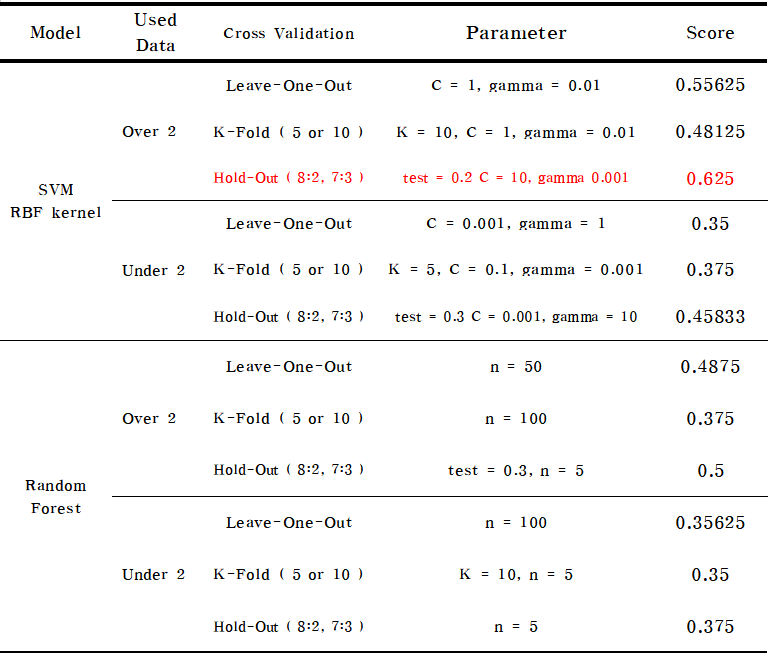
<br>
## 4. 결과에 대한 고찰

결과를 살펴보면 다음과 같은 결론이 나온다.
> 분류기 모델  : SVM - RBF kernel <br><br>
> UsedData     : Over 2 <br><br>
> 교차검증모델 : Hold-Out (8:2)  <br><br>
> Parameter    : test = 0.2, C = 10, gamma = 0.001 <br><br>
> 최종성능점수 : 0.625 <br><br>